#  Unit 2.2 Data Compression, Images
> Lab will perform alterations on images, manipulate RGB values, and reduce the number of pixels.  College Board requires you to learn about Lossy and Lossless compression.  
- toc: true 
- badges: true
- comments: true
- categories: [jupyter]

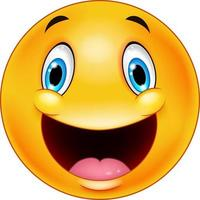

In [2]:

from IPython.display import Image, display
from pathlib import Path  # https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f

# prepares a series of images
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    if images is None:  # default image
        images = [
            {'source': "Peter Carolin", 'label': "Clouds Impression", 'file': "Smiley.jpg"},
        ]
    for image in images:
        # File to open
        image['filename'] = path / image['file']  # file with path
    return images

def image_display(images):
    for image in images:  
        display(Image(filename=image['filename']))


# Run this as standalone tester to see sample data printed in Jupyter terminal
if __name__ == "__main__":
    # print parameter supplied image

    # display default images from image_data()
    default_images = image_data()
    image_display(default_images)
    

## Enumerate "Data" Big Idea from College Board 
> Some of the big ideas and vocab that you observe, talk about it with a partner ...
- "Data compression is the reduction of the number of bits needed to represent data"
- "Data compression is used to save transmission time and storage space."
- "lossy data can reduce data but the original data is not recovered"
- "lossless data lets you restore and recover"

The [Image Lab Project](https://csp.nighthawkcodingsociety.com/starter/rgb/) contains a plethora of College Board Unit 2 data concepts. Working with Images provides many opportunities for compression and analyzing size.

## Image Files and Size
> Here are some [Images Files](https://github.com/nighthawkcoders/nighthawk_csp/tree/master/starter/static/img).  Download these files, load them into `images` directory under **_notebooks** in your Blog. 
  
- [Clouds Impression](https://github.com/nighthawkcoders/APCSP/blob/master/_notebooks/images/clouds-impression.png)
- [Lassen Volcano](https://github.com/nighthawkcoders/APCSP/blob/master/_notebooks/images/lassen-volcano.jpg)
- [Green Square](https://github.com/nighthawkcoders/APCSP/blob/master/_notebooks/images/green-square-16.png)

Describe some of the meta data and considerations when managing Image files.  Describe how these relate to Data Compression ...
- File Type, PNG and JPG are two types used in this lab
- Size, height and width, number of pixels
- Visual perception, lossy compression

## Displaying images in Python Jupyter notebook
> Python Libraries and Concepts used for Jupyter and Files/Directories

### IPython 
> Support visualization of data in Jupyter notebooks.  Visualization is specific to View, for the web visualization needs to be converted to HTML.

### pathlib
> File paths are different on Windows versus Mac and Linux.  This can cause problems in a project as you work and deploy on different Operating Systems (OS's), pathlib is a solution to this problem. 
- What are commands you use in terminal to access files?
- What are the command you use in Windows terminal to access files?
- What are some of the major differences?

Provide what you observed, struggled with, or leaned while playing with this code.
- Why is path a big deal when working with images?
- How does the meta data source and label relate to Unit 5 topics?
- Look up IPython, describe why this is interesting in Jupyter Notebooks for both Pandas and Images?

## Reading and Encoding Images (2 implementations follow)

### PIL (Python Image Library)
> [Pillow or PIL](https://pillow.readthedocs.io/en/stable/) provides the ability to work with images in Python.  [Geeks for Geeks](https://www.geeksforgeeks.org/working-images-python/?ref=lbp) shows some ideas on working with images.  


### base64
> Image formats (JPG, PNG) are often called ***Binary File formats**, it is difficult to pass these over HTTP.   Thus, [base64](https://en.wikipedia.org/wiki/Base64) converts binary encoded data (8-bit, ASCII/Unicode) into a text encoded scheme (24 bits, 6-bit Base64 digits).  Thus base64 is used to transport and embed binary images into textual assets such as HTML and CSS.
- How is Base64 similar or different to Binary and Hexadecimal?
- Translate first 3 letters of your name to Base64.


### numpy
> [Numpy](https://numpy.org/) is described as "The fundamental package for scientific computing with Python".  In the Image Lab, a Numpy array is created from the image data in order to simplify access and change to the RGB values of the pixels, converting pixels to grey scale.


### io, BytesIO
> Input and Output (I/O) is a fundamental of all Computer Programming. Input/output (I/O) buffering is a technique used to optimize I/O operations.  In large quantities of data, how many frames of input the server currently has queued is the buffer.  In this example, there is a very large picture that lags.
- Where have you been a consumer of buffering?  
- From your consumer experience, what effects have you experienced from buffering?  
- How do these effects apply to images?


## Data Structures, Imperative Programming Style, and working with Images
> Introduction to creating meta data and manipulating images.  Look at each procedure and explain the the purpose and results of this program.  Add any insights or challenges as you explored this program.
- Does this code seem like a series of steps are being performed?
- Describe Grey Scale algorithm in English or Pseudo code?
- Describe scale image?  What is before and after on pixels in three images?
- Is scale image a type of compression?  If so, line it up with College Board terms described?

In [3]:
from IPython.display import HTML, display
from pathlib import Path  # https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f
from PIL import Image as pilImage # as pilImage is used to avoid conflicts
from io import BytesIO
import base64
import numpy as np

# prepares a series of images
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    if images is None:  # default image
        images = [
            {'source': "Internet", 'label': "Green Square", 'file': "green-square-16.png"},
            {'source': "Peter Carolin", 'label': "Clouds Impression", 'file': "clouds-impression.png"},
            {'source': "Peter Carolin", 'label': "Lassen Volcano", 'file': "lassen-volcano.jpg"}
        ]
    for image in images:
        # File to open
        image['filename'] = path / image['file']  # file with path
    return images

# Large image scaled to baseWidth of 320
def scale_image(img):
    baseWidth = 320
    scalePercent = (baseWidth/float(img.size[0]))
    scaleHeight = int((float(img.size[1])*float(scalePercent)))
    scale = (baseWidth, scaleHeight)
    return img.resize(scale)

# PIL image converted to base64
def image_to_base64(img, format):
    with BytesIO() as buffer:
        img.save(buffer, format)
        return base64.b64encode(buffer.getvalue()).decode()

# Set Properties of Image, Scale, and convert to Base64
def image_management(image):  # path of static images is defaulted        
    # Image open return PIL image object
    img = pilImage.open(image['filename'])
    
    # Python Image Library operations
    image['format'] = img.format
    image['mode'] = img.mode
    image['size'] = img.size
    # Scale the Image
    img = scale_image(img)
    image['pil'] = img
    image['scaled_size'] = img.size
    # Scaled HTML
    image['html'] = '<img src="data:image/png;base64,%s">' % image_to_base64(image['pil'], image['format'])
    
# Create Grey Scale Base64 representation of Image
def image_management_add_html_grey(image):
    # Image open return PIL image object
    img = image['pil']
    format = image['format']
    
    img_data = img.getdata()  # Reference https://www.geeksforgeeks.org/python-pil-image-getdata/
    image['data'] = np.array(img_data) # PIL image to numpy array
    image['gray_data'] = [] # key/value for data converted to gray scale

    # 'data' is a list of RGB data, the list is traversed and hex and binary lists are calculated and formatted
    for pixel in image['data']:
        # create gray scale of image, ref: https://www.geeksforgeeks.org/convert-a-numpy-array-to-an-image/
        average = (pixel[0] + pixel[1] + pixel[2]) // 3  # average pixel values and use // for integer division
        if len(pixel) > 3:
            image['gray_data'].append((average, average, average, pixel[3])) # PNG format
        else:
            image['gray_data'].append((average, average, average))
        # end for loop for pixels
        
    img.putdata(image['gray_data'])
    image['html_grey'] = '<img src="data:image/png;base64,%s">' % image_to_base64(img, format)


# Jupyter Notebook Visualization of Images
if __name__ == "__main__":
    # Use numpy to concatenate two arrays
    images = image_data()
    
    # Display meta data, scaled view, and grey scale for each image
    for image in images:
        image_management(image)
        print("---- meta data -----")
        print(image['label'])
        print(image['source'])
        print(image['format'])
        print(image['mode'])
        print("Original size: ", image['size'])
        print("Scaled size: ", image['scaled_size'])
        
        print("-- original image --")
        display(HTML(image['html'])) 
        
        print("--- grey image ----")
        image_management_add_html_grey(image)
        display(HTML(image['html_grey'])) 
    print()

FileNotFoundError: [Errno 2] No such file or directory: '/home/qaisjamili/vscode/quissite/_notebooks/images/green-square-16.png'

## Data Structures and OOP
> Most data structures classes require Object Oriented Programming (OOP).  Since this class is lined up with a College Course,  OOP will be talked about often.  Functionality in remainder of this Blog is the same as the prior implementation.  Highlight some of the key difference you see between imperative and oop styles.
-  Read imperative and object-oriented programming on Wikipedia
-  Consider how data is organized in two examples, in relations to procedures
-  Look at Parameters in Imperative and Self in OOP

## Additionally, review all the imports in these three demos.  Create a definition of their purpose, specifically these ...
- PIL
- numpy
- base64

In [ ]:
from IPython.display import HTML, display
from pathlib import Path  # https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f
from PIL import Image as pilImage # as pilImage is used to avoid conflicts
from io import BytesIO
import base64
import numpy as np


class Image_Data:

    def __init__(self, source, label, file, path, baseWidth=320):
        self._source = source    # variables with self prefix become part of the object, 
        self._label = label
        self._file = file
        self._filename = path / file  # file with path
        self._baseWidth = baseWidth

        # Open image and scale to needs
        self._img = pilImage.open(self._filename)
        self._format = self._img.format
        self._mode = self._img.mode
        self._originalSize = self.img.size
        self.scale_image()
        self._html = self.image_to_html(self._img)
        self._html_grey = self.image_to_html_grey()


    @property
    def source(self):
        return self._source  
    
    @property
    def label(self):
        return self._label 
    
    @property
    def file(self):
        return self._file   
    
    @property
    def filename(self):
        return self._filename   
    
    @property
    def img(self):
        return self._img
             
    @property
    def format(self):
        return self._format
    
    @property
    def mode(self):
        return self._mode
    
    @property
    def originalSize(self):
        return self._originalSize
    
    @property
    def size(self):
        return self._img.size
    
    @property
    def html(self):
        return self._html
    
    @property
    def html_grey(self):
        return self._html_grey
        
    # Large image scaled to baseWidth of 320
    def scale_image(self):
        scalePercent = (self._baseWidth/float(self._img.size[0]))
        scaleHeight = int((float(self._img.size[1])*float(scalePercent)))
        scale = (self._baseWidth, scaleHeight)
        self._img = self._img.resize(scale)
    
    # PIL image converted to base64
    def image_to_html(self, img):
        with BytesIO() as buffer:
            img.save(buffer, self._format)
            return '<img src="data:image/png;base64,%s">' % base64.b64encode(buffer.getvalue()).decode()
            
    # Create Grey Scale Base64 representation of Image
    def image_to_html_grey(self):
        img_grey = self._img
        numpy = np.array(self._img.getdata()) # PIL image to numpy array
        
        grey_data = [] # key/value for data converted to gray scale
        # 'data' is a list of RGB data, the list is traversed and hex and binary lists are calculated and formatted
        for pixel in numpy:
            # create gray scale of image, ref: https://www.geeksforgeeks.org/convert-a-numpy-array-to-an-image/
            average = (pixel[0] + pixel[1] + pixel[2]) // 3  # average pixel values and use // for integer division
            if len(pixel) > 3:
                grey_data.append((average, average, average, pixel[3])) # PNG format
            else:
                grey_data.append((average, average, average))
            # end for loop for pixels
            
        img_grey.putdata(grey_data)
        return self.image_to_html(img_grey)

        
# prepares a series of images, provides expectation for required contents
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    if images is None:  # default image
        images = [
            {'source': "Internet", 'label': "Green Square", 'file': "green-square-16.png"},
            {'source': "Peter Carolin", 'label': "Clouds Impression", 'file': "clouds-impression.png"},
            {'source': "Peter Carolin", 'label': "Lassen Volcano", 'file': "lassen-volcano.jpg"}
        ]
    return path, images

# turns data into objects
def image_objects():        
    id_Objects = []
    path, images = image_data()
    for image in images:
        id_Objects.append(Image_Data(source=image['source'], 
                                  label=image['label'],
                                  file=image['file'],
                                  path=path,
                                  ))
    return id_Objects

# Jupyter Notebook Visualization of Images
if __name__ == "__main__":
    for ido in image_objects(): # ido is an Imaged Data Object
        
        print("---- meta data -----")
        print(ido.label)
        print(ido.source)
        print(ido.file)
        print(ido.format)
        print(ido.mode)
        print("Original size: ", ido.originalSize)
        print("Scaled size: ", ido.size)
        
        print("-- scaled image --")
        display(HTML(ido.html))
        
        print("--- grey image ---")
        display(HTML(ido.html_grey))
        
    print()

## Hacks
> Early Seed award
- Add this Blog to you own Blogging site.
- In the Blog add a Happy Face image.
- Have Happy Face Image open when Tech Talk starts, running on localhost.  Don't tell anyone. Show to Teacher.

> AP Prep
- In the Blog add notes and observations on each code cell that request an answer.
- In blog add College Board practice problems for 2.3
- Choose 2 images, one that will more likely result in lossy data compression and one that is more likely to result in lossless data compression. Explain.

> Project Addition
- If your project has images in it, try to implement an image change that has a purpose. (Ex. An item that has been sold out could become gray scale)

> Pick a programming paradigm and solve some of the following ...
- Numpy, manipulating pixels.  As opposed to Grey Scale treatment, pick a couple of other types like red scale, green scale, or blue scale.  We want you to be manipulating pixels in the image.
- Binary and Hexadecimal reports.  Convert and produce pixels in binary and Hexadecimal and display.
- Compression and Sizing of images.  Look for insights into compression Lossy and Lossless.  Look at PIL library and see if there are other things that can be done.
- There are many effects you can do as well with PIL. Blur the image or write Meta Data on screen, aka Title, Author and Image size.

